# What are the major trends that we can identify for PM 2.5/PM10 and NOx/O3?

## Requirement

1. Explain its relevance to your main question.
2. What is your methodology for analysis?
3. Produce at least one graphical representation (chart) per sub-question:
- The code is clear and readable
- The chosen graphical representation is consistent with the type of data and the
analysis approach.
- Graphic representation is complete
- The graphical representation respects best practices
- Graphical representation minimizes potential bias
4. What analysis can you draw from the graphs? A detailed analysis is expected.
5. What are your results?
6. What are the limitations?

- Stations Daily: From 2015-04-02 to 2021-12-31
- Stations Hourly: From 2015-04-02 09:00:00 to 2021-12-31 23:00:00
- Station rsinaica: 

datetime,station_id,**PM2.5**,**PM10**,**NOx**,**O3**,CO,HR,NO,NO2,TMP,BEN,CH4,CN,CO2,H2S,HCNM,HCT,HRI,IUV,PB,PP,PST,RS,TMPI,UVA,XIL


### Understanding about the factors: PM2.5, PM10, NOx, O3

General Scientific Range for PM2.5 
(Particulate Matter ≤ 2.5 micrometers):
In environmental science and air quality monitoring, PM2.5 is measured in micrograms per cubic meter (µg/m³).

🌍 Typical Ranges:


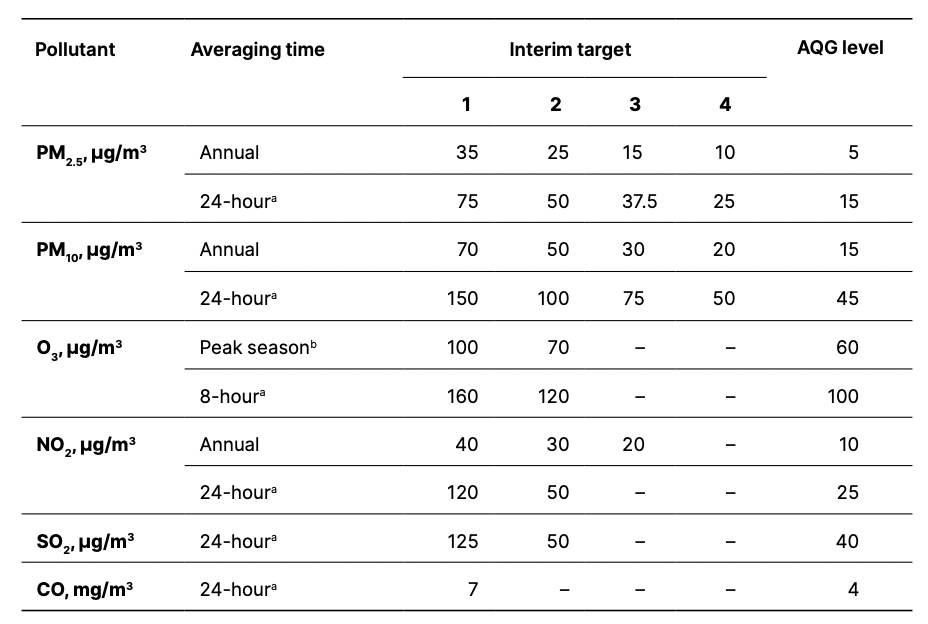

| Level               | Description                                |
|---------------------|--------------------------------------------|
| WHO AQG             | Final guideline for optimal public health. |
| Interim Target 4    | Significant health risk reduction.         |
| Interim Target 3    | Moderate health benefits.                  |
| Interim Target 2    | Limited but measurable improvements.       |
| Interim Target 1    | First milestone for very polluted areas.   |


WHO (2021). Global Air Quality Guidelines: https://www.who.int/publications/i/item/9789240034228


## Analyses

#### General information about dataset

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# pd.set_option('display.float_format', '{:.20f}'.format)

In [24]:

df_daily = pd.read_csv('Data/stations_daily.csv')
print("stations daily shape :",df_daily.shape)
# Keep only the 6 columns to support the analysis
SELECTED_COLUMNS = ['datetime', 'station_id', 'PM2.5', 'PM10','NOx', 'O3', 'CO', 'NO2']
df_daily = df_daily[SELECTED_COLUMNS]
print("stations daily shape :", df_daily.shape)


stations daily shape : (231592, 27)
stations daily shape : (231592, 8)


In [25]:
df_rsinaica = pd.read_csv('Data/stations_rsinaica_cities.csv')
print("stations rsinaica shape :", df_rsinaica.shape)
df_rsinaica = df_rsinaica[['station_id', 'station_name', 'lat', 'lon', 'CityNoAcc']]

# Merge datasets on station_id
df_merged = pd.merge(df_daily, df_rsinaica, on='station_id', how='inner')
print("Merged data shape (before filtering cities):", df_merged.shape)

# Filter for specific cities
SELECTED_STATIONS = ['Mexico City', 'Guadalajara', 'Monterrey']
df_merged = df_merged[df_merged['CityNoAcc'].isin(SELECTED_STATIONS)]
print("Merged data shape (after filtering cities):", df_merged.shape)

stations rsinaica shape : (341, 10)
Merged data shape (before filtering cities): (231592, 12)
Merged data shape (after filtering cities): (51675, 12)


**Stations daily collect data from 78 stations, do not have all information about the air quality of all stations (341) in Mexico**

#### Handling Outlier Value


During performing analysis data from the dataset, we found that the maximum value in the PM2.5, PM10, NOx, and O3 columns is larger than the maximum value in the standard range. 

Example: the maximum value in PM2.5:
Max PM2.5: **1.80616e+38*8 at time(s) at 2020-07-13

We tried the original data as the chart below. If we keep the original data from the dataset, then the outlier data is much larger than the average value of the years, so the chart cannot display the correct information of other years.

To resolve this issue, we replace the outlier value with "NaN" value. And during calculating the average value for each year, we will exclude "NaN" value.

##### This below chart keep the invalid value of PM2.5 (Value larger than 1000)

/var/folders/_x/lst02f891nj0x0cslky5z3900000gn/T/ipykernel_39698/3679403252.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['datetime'].dt.year
/var/folders/_x/lst02f891nj0x0cslky5z3900000gn/T/ipykernel_39698/3679403252.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e['year'] = df_e['datetime'].dt.year


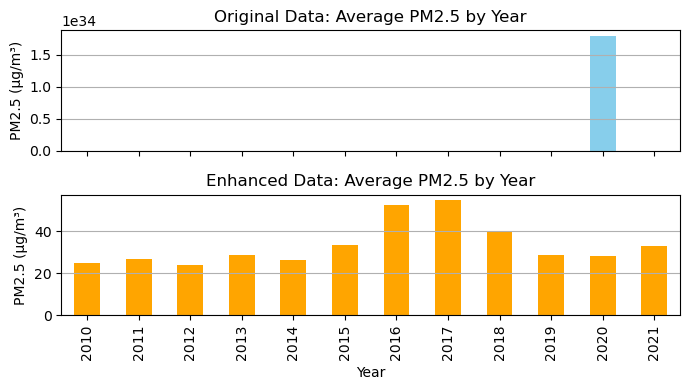

In [26]:

# Parse 'datetime' as datetime type
df_daily['datetime'] = pd.to_datetime(df_daily['datetime'], errors='coerce')
df_daily_EH = df_daily.copy()
df_daily_EH.loc[df_daily_EH['PM2.5'] > 1000, 'PM2.5'] = np.nan

# Drop rows with invalid datetime or NaN in PM2.5
df = df_daily.dropna(subset=['datetime', 'PM2.5'])
df_e = df_daily_EH.dropna(subset=['datetime', 'PM2.5'])

# Extract year
df['year'] = df['datetime'].dt.year
df_e['year'] = df_e['datetime'].dt.year

# Group by year and calculate mean PM2.5
pm25_yearly_avg = df.groupby('year')['PM2.5'].mean()
pm25_yearly_avg_e = df_e.groupby('year')['PM2.5'].mean()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7, 4), sharex=True)

# First subplot: Original Data
pm25_yearly_avg.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Original Data: Average PM2.5 by Year')
ax1.set_ylabel('PM2.5 (µg/m³)')
ax1.grid(axis='y')

# Second subplot: Enhanced Data
pm25_yearly_avg_e.plot(kind='bar', color='orange', ax=ax2)
ax2.set_title('Enhanced Data: Average PM2.5 by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('PM2.5 (µg/m³)')
ax2.grid(axis='y')

# Improve layout
plt.tight_layout()
plt.show()

In [27]:

df_daily['datetime'] = pd.to_datetime(df_daily['datetime'])
# Display data types of each column
print(df_daily.shape)
min_pm25 = df_daily['PM2.5'].min()
max_pm25 = df_daily['PM2.5'].max()

min_datetime = df_daily[df_daily['PM2.5'] == min_pm25]['datetime']
max_datetime = df_daily[df_daily['PM2.5'] == max_pm25]['datetime']

print(f"Min PM2.5: {min_pm25}")

print(f"\nMax PM2.5: {max_pm25} at time(s):")
print(max_datetime)


(231592, 8)
Min PM2.5: 0.0

Max PM2.5: 1.80616e+38 at time(s):
9366   2020-07-13
Name: datetime, dtype: datetime64[ns]


In [28]:
# Filter out values where PM2.5 < 1000
valid_pm25 = df_daily[df_daily['PM2.5'] < 1000]

# Find the maximum among those
max_pm25_valid = valid_pm25['PM2.5'].max()

# Get the datetime(s) where this max occurred
max_datetime_valid = valid_pm25[valid_pm25['PM2.5'] == max_pm25_valid]['datetime']

print(f"Max PM2.5 < 1000: {max_pm25_valid}")
print("Datetime(s):")
print(max_datetime_valid)


Max PM2.5 < 1000: 999.9874458333334
Datetime(s):
98959   2021-07-03
Name: datetime, dtype: datetime64[ns]


### Common function

In [29]:
def ppm_to_ugm3(ppm, molecular_weight, temperature_c=25, pressure_kpa=101.325):
    ugm3 = ppm_to_mgm3(ppm, molecular_weight, temperature_c, pressure_kpa) * 1000  # multiply by 1000 to get µg/m³
    return ugm3
    

def ppm_to_mgm3(ppm, molecular_weight, temperature_c=25, pressure_kpa=101.325):
    """
    Convert concentration from ppm to mg/m³.
    
    Parameters:
        ppm (float): concentration in parts per million
        molecular_weight (float): molecular weight of the gas (g/mol)
        temperature_c (float): temperature in Celsius (default: 25°C)
        pressure_kpa (float): pressure in kPa (default: 101.325 kPa)
    
    Returns:
        float: concentration in mg/m³
    """
    R = 8.314  # gas constant in J/(mol·K)
    T = temperature_c + 273.15  # convert to Kelvin
    P = pressure_kpa * 1000     # convert to Pascals
    
    # Ideal Gas Law-based conversion
    mgm3 = ppm * (molecular_weight * P) / (R * T)  # no need to multiply by 1000 for mg/m³
    return mgm3


def CO_to_mgm3(co_ppm):
    """
    Convert CO concentration from ppm to mg/m³.
    
    Parameters:
        co_ppm (float): CO concentration in ppm
    
    Returns:
        float: CO concentration in mg/m³
    """
    molecular_weight_CO = 28.01  # g/mol for CO
    return ppm_to_mgm3(co_ppm, molecular_weight_CO)/1000  # convert to mg/m³

def NO2_to_ugm3(no2_ppm):
    """
    Convert NO2 concentration from ppm to µg/m³.
    
    Parameters:
        no2_ppm (float): NO2 concentration in ppm
    
    Returns:
        float: NO2 concentration in µg/m³
    """
    molecular_weight_NO2 = 46.01  # g/mol for NO2
    return ppm_to_ugm3(no2_ppm, molecular_weight_NO2)

def O3_to_ugm3(o3_ppm):
    """
    Convert O3 concentration from ppm to µg/m³. 
    Parameters:
        o3_ppm (float): O3 concentration in ppm
    
    Returns:
        float: O3 concentration in µg/m³
    """
    molecular_weight_O3 = 46.01  # g/mol for NO2
    return ppm_to_ugm3(o3_ppm, molecular_weight_O3)


def clearn_data(df):
    """
    Cleans the data by removing outliers and filling NaN values.
    """
    # Ensure datetime is parsed
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

    # Clean out extreme/invalid values
    df_clean = df.copy()
    df_clean.loc[df_clean['PM2.5'] > 1000, 'PM2.5'] = np.nan
    df_clean.loc[df_clean['PM10'] > 1000, 'PM10'] = np.nan
    df_clean.loc[df_clean['O3'] > 1000, 'O3'] = np.nan
    df_clean.loc[df_clean['CO'] > 50000, 'CO'] = np.nan
    df_clean.loc[df_clean['NO2'] > 2000, 'NO2'] = np.nan

    # Drop rows with invalid datetime
    df_clean = df_clean.dropna(subset=['datetime'])

    # Extract year
    df_clean['year'] = df_clean['datetime'].dt.year
    
    return df_clean

def convert_units(df):
    """
    Converts the units of the pollutants from ppm to µg/m³.
    """
    # Create a new DataFrame with converted values
    df_converted = df.copy()

    # Apply the conversion functions, only where values are not missing (to avoid errors)
    df_converted['O3'] = df_converted['O3'].apply(lambda x: O3_to_ugm3(x) if pd.notnull(x) else x)
    df_converted['NO2'] = df_converted['NO2'].apply(lambda x: NO2_to_ugm3(x) if pd.notnull(x) else x)
    df_converted['CO'] = df_converted['CO'].apply(lambda x: CO_to_mgm3(x) if pd.notnull(x) else x)

    return df_converted

def get_maximum_pollutant(df):
    """
    Returns the maximum value of a specified pollutant and its corresponding datetime.
    """
    max_pm25 = df['PM2.5'].max()
    max_O3 = df['O3'].max()
    max_PM10 = df['PM10'].max()
    max_CO = df['CO'].max()
    max_NO2 = df['NO2'].max()

    print(f"Max CO: {max_CO}")
    print(f"Max NO2: {max_NO2}")
    print(f"Max PM2.5: {max_pm25}")
    print(f"Max PM10: {max_PM10}")
    print(f"Max O3: {max_O3}")
    


### PM2.5, PM10, NOx, O3 every Year

The Graph below shows the average of PM2.5, PM10, NOx, and O3 every year; most of the values are in the Good range.
=> If grouped data by year, there is no effect of  PM2.5, PM10, NOx, and O3 on health.

In [30]:
df_converted = convert_units(df_daily)
df_clean = clearn_data(df_converted)

# Group by year and calculate mean for PM2.5, PM10, NO2, CO, and O3
yearly_avg = df_clean.groupby('year')[['PM2.5', 'PM10', 'NO2', 'CO', 'O3']].mean().dropna()

print(df_clean.tail(5))

get_maximum_pollutant(yearly_avg)

         datetime  station_id      PM2.5       PM10       NOx  O3        CO  \
231587 2021-12-27         426  28.956522  67.375000  0.036429 NaN  1.928756   
231588 2021-12-28         426  20.818182  55.833333  0.037508 NaN  1.946408   
231589 2021-12-29         426  16.857143  51.458333  0.045588 NaN  1.984095   
231590 2021-12-30         426  21.555556  51.750000  0.037229 NaN  1.740317   
231591 2021-12-31         426  27.894737  60.291667  0.037571 NaN  1.798519   

        NO2  year  
231587  NaN  2021  
231588  NaN  2021  
231589  NaN  2021  
231590  NaN  2021  
231591  NaN  2021  
Max CO: 25.73372738382471
Max NO2: 1381.835905341788
Max PM2.5: 54.61468178042719
Max PM10: 83.6698026014476
Max O3: 532.8705057581403


#### PM2.5 and PM10

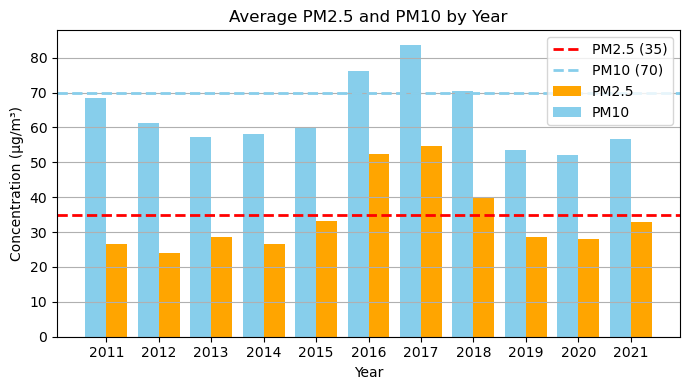

In [31]:
# Plotting
fig, ax = plt.subplots(figsize=(7, 4))

# Set bar width and positions
bar_width = 0.4
years = yearly_avg.index.astype(str)
x = np.arange(len(years))

# Plot side-by-side bars
ax.bar(x + bar_width/2, yearly_avg['PM2.5'], width=bar_width, label='PM2.5', color='orange')
ax.bar(x - bar_width/2, yearly_avg['PM10'], width=bar_width, label='PM10', color='skyblue')

ax.axhline(35, color='red', linestyle='--', linewidth=2, label='PM2.5 (35)')
ax.axhline(70, color='skyblue', linestyle='--', linewidth=2, label='PM10 (70)')

# Customize plot
ax.set_title('Average PM2.5 and PM10 by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Concentration (µg/m³)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()


#### NO2 and O3

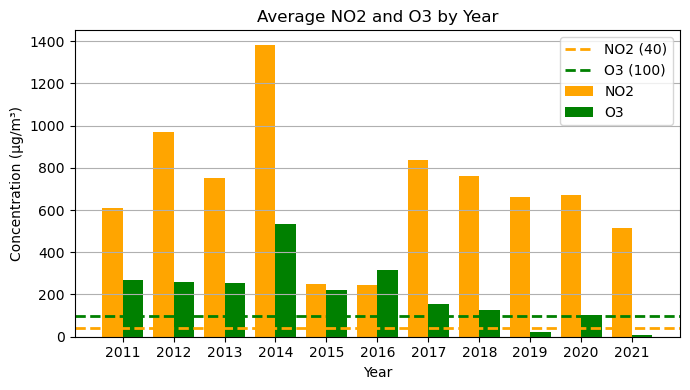

In [32]:
# Plotting
fig, ax = plt.subplots(figsize=(7, 4))

# Set bar width and positions
bar_width = 0.4
years = yearly_avg.index.astype(str)
x = np.arange(len(years))

# Plot side-by-side bars
ax.bar(x - bar_width/2, yearly_avg['NO2'], width=bar_width, label='NO2', color='orange')
ax.bar(x + bar_width/2, yearly_avg['O3'], width=bar_width, label='O3', color='green')
ax.axhline(40, color='orange', linestyle='--', linewidth=2, label='NO2 (40)')
ax.axhline(100, color='green', linestyle='--', linewidth=2, label='O3 (100)')


# Customize plot
ax.set_title('Average NO2 and O3 by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Concentration (µg/m³)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()


#### CO

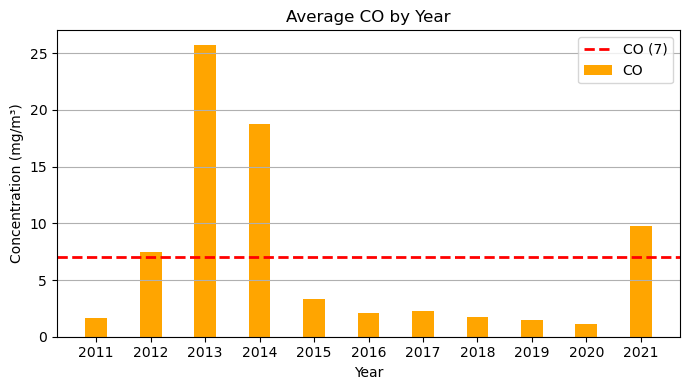

In [33]:
# Plotting
fig, ax = plt.subplots(figsize=(7, 4))

# Set bar width and positions
bar_width = 0.4
years = yearly_avg.index.astype(str)
x = np.arange(len(years))

# Plot side-by-side bars
ax.bar(x, yearly_avg['CO'], width=bar_width, label='CO', color='orange')
ax.axhline(7, color='red', linestyle='--', linewidth=2, label='CO (7)')


# Customize plot
ax.set_title('Average CO by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Concentration (mg/m³)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()


### PM 2.5/PM10 and NOx/O3 and station_id

In [34]:
df_converted = convert_units(df_merged)
df_clean = clearn_data(df_converted)
print(df_clean.head(5))

        datetime  station_id  PM2.5  PM10  NOx  O3  CO  NO2 station_name  \
59820 2000-01-01         102    NaN   NaN  NaN NaN NaN  NaN       Centro   
59821 2000-01-02         102    NaN   NaN  NaN NaN NaN  NaN       Centro   
59822 2000-01-03         102    NaN   NaN  NaN NaN NaN  NaN       Centro   
59823 2000-01-04         102    NaN   NaN  NaN NaN NaN  NaN       Centro   
59824 2000-01-05         102    NaN   NaN  NaN NaN NaN  NaN       Centro   

             lat         lon    CityNoAcc  year  
59820  20.673765 -103.333336  Guadalajara  2000  
59821  20.673765 -103.333336  Guadalajara  2000  
59822  20.673765 -103.333336  Guadalajara  2000  
59823  20.673765 -103.333336  Guadalajara  2000  
59824  20.673765 -103.333336  Guadalajara  2000  


In [35]:
# Select only the needed columns
cols_to_avg = ['PM2.5', 'PM10', 'O3', 'CO', 'NO2']
grouped_stations = df_clean.groupby(['CityNoAcc', 'year'])[cols_to_avg].mean().reset_index()

# Show result
print(grouped_stations.tail(5))
get_maximum_pollutant(grouped_stations)

    CityNoAcc  year      PM2.5       PM10  O3        CO          NO2
40  Monterrey  2017  19.183925  64.472266 NaN  1.377766          NaN
41  Monterrey  2018  21.288717  63.158884 NaN  1.947048  1376.344675
42  Monterrey  2019  25.663281  61.116053 NaN  1.902825  1128.431659
43  Monterrey  2020  21.424643  49.195235 NaN  2.689599  1249.532606
44  Monterrey  2021  21.862196  60.367435 NaN  2.223746          NaN
Max CO: 2.689598732335934
Max NO2: 1376.344675300442
Max PM2.5: 65.62502832663866
Max PM10: 82.62715526556106
Max O3: 268.67420458386823


The average value of NOx and O3 always keep at Good level, there is no effect on the health though the Year and specifiy station.
=> We will focus on PM2.5 and PM10

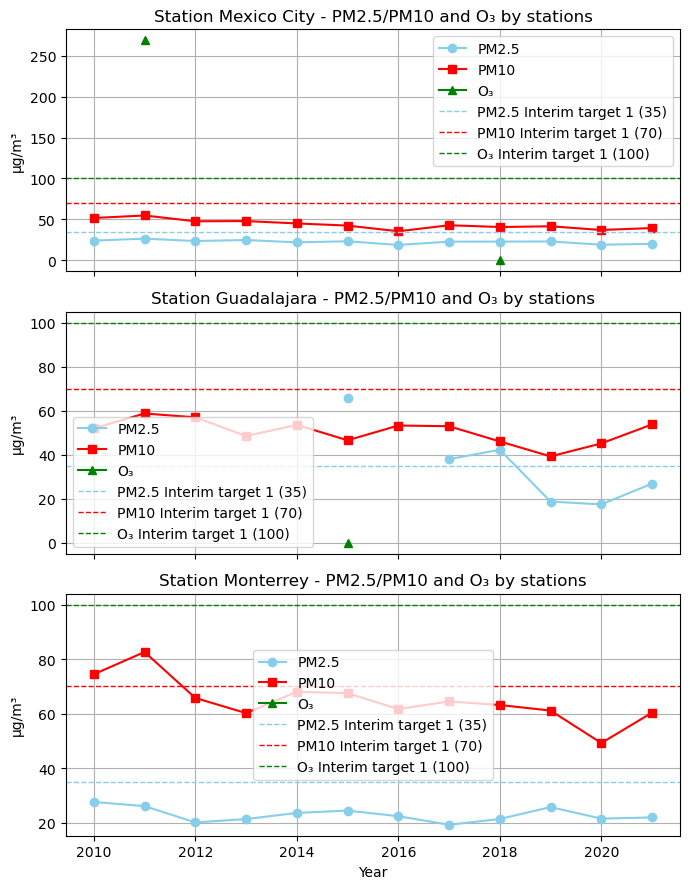

In [36]:

# Step 2: Set up subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 9), sharex=True)

# Step 3: Plot each station's data
for i, station in enumerate(SELECTED_STATIONS):
    # Filter data for the selected station
    station_data = grouped_stations[grouped_stations['CityNoAcc'] == station]

    # Sort by year for proper plotting
    station_data = station_data.sort_values('year')

    # Plot PM2.5 and PM10
    axs[i].plot(station_data['year'], station_data['PM2.5'], marker='o', label='PM2.5', color='skyblue')
    axs[i].plot(station_data['year'], station_data['PM10'], marker='s', label='PM10', color='red')
    axs[i].plot(station_data['year'], station_data['O3'], marker='^', label='O₃', color='green')

    axs[i].axhline(35, color='skyblue', linestyle='--', linewidth=1, label='PM2.5 Interim target 1 (35)')
    axs[i].axhline(70, color='red', linestyle='--', linewidth=1, label='PM10 Interim target 1 (70)')
    axs[i].axhline(100, color='green', linestyle='--', linewidth=1, label='O₃ Interim target 1 (100)')

    axs[i].set_title(f'Station {station} - PM2.5/PM10 and O₃ by stations')
    axs[i].set_ylabel('µg/m³')
    axs[i].legend()
    axs[i].grid(True)

# Shared X-axis label
axs[-1].set_xlabel('Year')

plt.tight_layout()
plt.show()
